# Mini-Projetos: 5 e 6

## Mini-Projeto 5: Distribuição Gamma

In [178]:
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import random as rnd
import warnings
warnings.filterwarnings('ignore')

## Método de exponenciais

### Construção de histograma Gamma: soma de exponenciais

In [2]:
def get_gamma_dist_with_exp(N, a):
    Y = []
    for i in range(N):
        sum_exp = 0
        for j in range(a):
            r1 = rnd.random()
            sum_exp+=-np.log(r1)
            
        Y.append(sum_exp)
    return Y

In [21]:
def multiple_hist_plots(N, func):
    fig, axs = plt.subplots(2,2,figsize=(18,10))
    plt.suptitle("Distribuição Gamma via exponenciais\nN = {} amostras".format(N), fontsize=18)

    a = 1
    Y = func(N, a)
    axs[0,0].plot(X, [stats.gamma.pdf(i, a=a) for i in X], label='Teórico')
    axs[0,0].hist(Y, bins=50, density=True, edgecolor='k', label='Experimento, a={}'.format(a))
    axs[0,0].legend(fontsize=12)
    axs[0,0].set_xlim(0,10)

    a = 4
    Y = func(N, a)
    axs[0,1].plot(X, [stats.gamma.pdf(i, a=a) for i in X], label='Teórico')
    axs[0,1].hist(Y, bins=50, density=True, edgecolor='k', label='Experimento, a={}'.format(a))
    axs[0,1].legend(fontsize=12)
    axs[0,1].set_xlim(0,20)

    a = 8
    Y = func(N, a)
    axs[1,0].plot(X, [stats.gamma.pdf(i, a=a) for i in X], label='Teórico')
    axs[1,0].hist(Y, bins=50, density=True, edgecolor='k', label='Experimento, a={}'.format(a))
    axs[1,0].legend(fontsize=12)

    a = 10
    Y = func(N, a)
    axs[1,1].plot(X, [stats.gamma.pdf(i, a=a) for i in X], label='Teórico')
    axs[1,1].hist(Y, bins=50, density=True, edgecolor='k', label='Experimento, a={}'.format(a))
    axs[1,1].legend(fontsize=12)

    axs[1,1].set_xlabel('X (variável aleatória)', fontsize=12)
    axs[1,0].set_xlabel('X (variável aleatória)', fontsize=12)
    axs[0,0].set_ylabel('P(X)', fontsize=12)
    axs[1,0].set_ylabel('P(X)', fontsize=12)

    plt.show()

### Gamma via método de rejeição: exponenciais

In [113]:
generalized_exp_dist = lambda x, a: -(a)*np.log((1-x))

In [97]:
general_exp = lambda x, a: (1/a)*np.exp(-x/a)

In [98]:
normalized_func = lambda a: ((a**a)/math.gamma(a))*np.exp(-(a-1))

In [120]:
gamma_dist = lambda x, a: (1/math.gamma(a)) * (x**(a-1)) * np.exp(-x)

In [99]:
comparison_func = lambda x, a: ((x/a)**(a-1))*np.exp((a-1) * (1 - (x/a)))

In [154]:
def get_gamma_via_rejection_exp(N, a):
    rand_dist_x = [generalized_exp_dist(rnd.random(), a) for i in range(N)]
    rand_dist_y = []
    point_cmap = []
    
    for i in range(N):
        r1 = rnd.random() * normalized_func(a) * general_exp(rand_dist_x[i], a)
        rand_dist_y.append(r1)
        r2 = rnd.random()
        
        if r1 < gamma_dist(rand_dist_x[i], a):
            point_cmap.append('b')
            
        else:
            point_cmap.append('r')
            
    return rand_dist_x, rand_dist_y, point_cmap

In [155]:
def plot_reject_exp(N, a):
    XYs = get_gamma_via_rejection_exp(N, a)

    plt.figure(figsize=(12,6))
    plt.suptitle('Distribuição Gamma: rejeição via exponencial\nN = {}'.format(N), fontsize=16)
    plt.scatter(XYs[0], XYs[1], marker='o', edgecolor='k', c=XYs[2])
    plt.ylabel('P(X)', fontsize=12)
    plt.xlabel("X", fontsize=12)
    plt.xlim(-1,30)
    plt.show()

## Método via distribuição de Cauchy

In [164]:
cauchy_dist = lambda x,gama,x0: (1/(np.pi*gama)) * 1/(1+((x-x0)/gama)**2)

In [165]:
norm_gamma_cauchy_func = lambda a,gama,x0: gamma_dist(x0, a) / cauchy_dist(x0, gama, x0)

In [166]:
cauchy_variation = lambda x,a,gama,x0: ((x/(a-1))**(a-1))*np.exp(a-1-x) * (1 + ((x-a-1)/gama)**2)

In [167]:
cauchy_quantile_func = lambda p,gama,x0: x0 + gama*np.tan(np.pi * (p - 0.5))

In [170]:
def get_gamma_via_rejection_cauchy(N, a):
    x0 = 9
    gama = 5
    
    rand_dist_x = [cauchy_quantile_func(rnd.random(), gama, x0) for i in range(N)]
    rand_dist_y = []
    point_cmap = []
    
    for i in range(N):
        r1 = rnd.random() * norm_gamma_cauchy_func(a, gama, x0) * cauchy_dist(rand_dist_x[i], gama, x0)
        rand_dist_y.append(r1)
        r2 = rnd.random()
        
        if r1 < gamma_dist(rand_dist_x[i], a):
            point_cmap.append('b')
            
        else:
            point_cmap.append('r')
            
    return rand_dist_x, rand_dist_y, point_cmap

In [180]:
def plot_reject_cauchy(N, a):
    XYs = get_gamma_via_rejection_cauchy(N, a)

    plt.figure(figsize=(12,6))
    plt.suptitle('Distribuição Gamma: rejeição via exponencial\nN = {}'.format(N), fontsize=16)
    plt.scatter(XYs[0], XYs[1], marker='o', edgecolor='k', c=XYs[2])
    plt.ylabel('P(X)', fontsize=12)
    plt.xlabel("X", fontsize=12)
    plt.xlim(-1,30)
    plt.show()

## Resultados

### Construção da função Gamma: soma de exponenciais

In [22]:
X = np.linspace(0,30,num=1000)

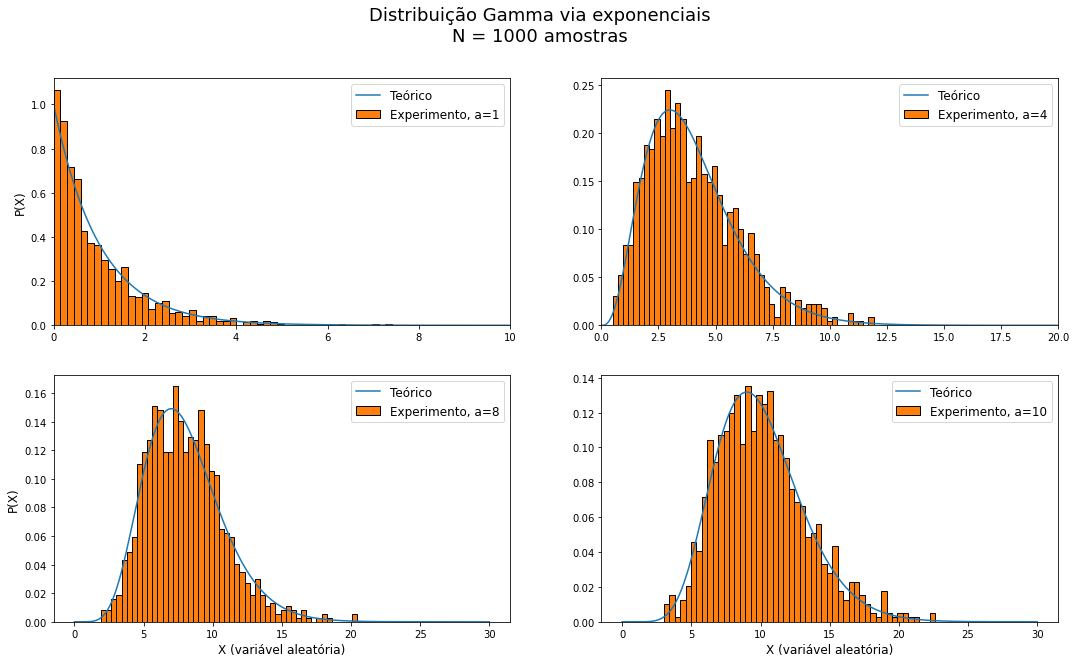

In [23]:
multiple_hist_plots(N=1000, func=get_gamma_dist_with_exp)

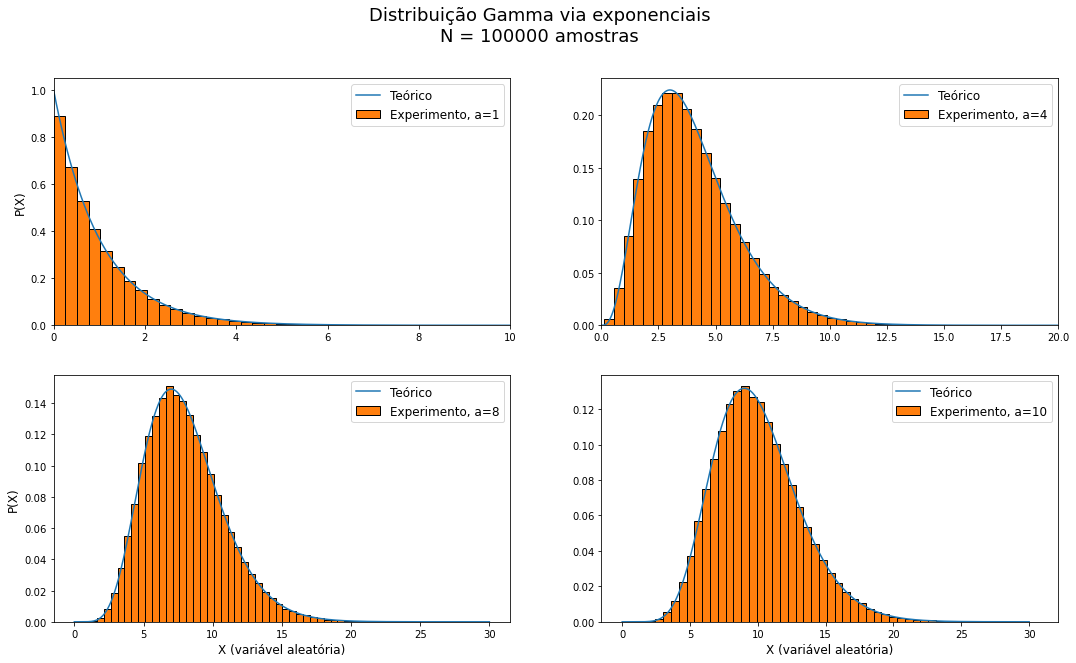

In [24]:
multiple_hist_plots(N=100000, func=get_gamma_dist_with_exp)

### Obtenção de pontos da Gamma por comparação: Exponencial

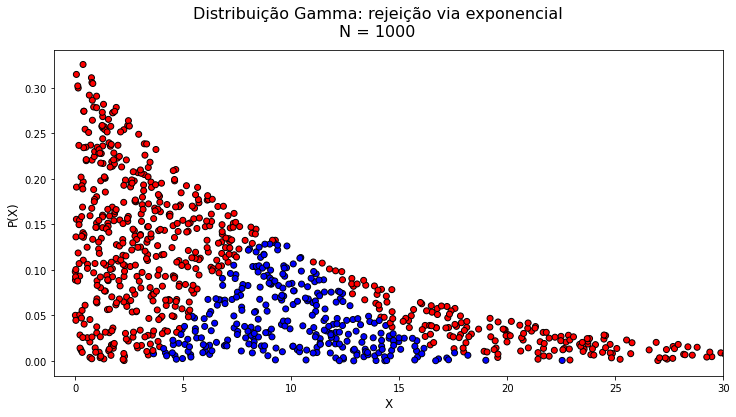

In [152]:
N = 1000
a = 10
plot_reject_exp(N, a)

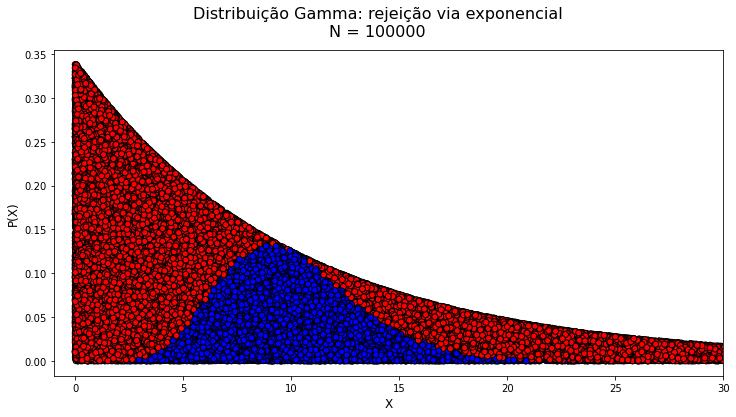

In [153]:
N = 100000
a = 10
plot_reject_exp(N, a)

### Obtenção de pontos da Gamma por comparação: Cauchy

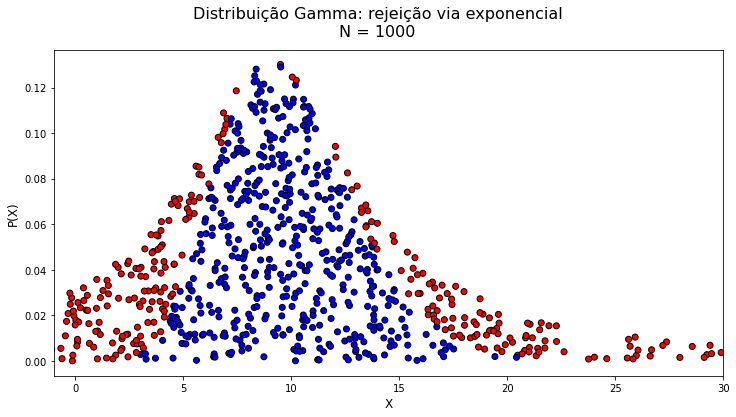

In [181]:
N = 1000
a = 10
plot_reject_cauchy(N, a)

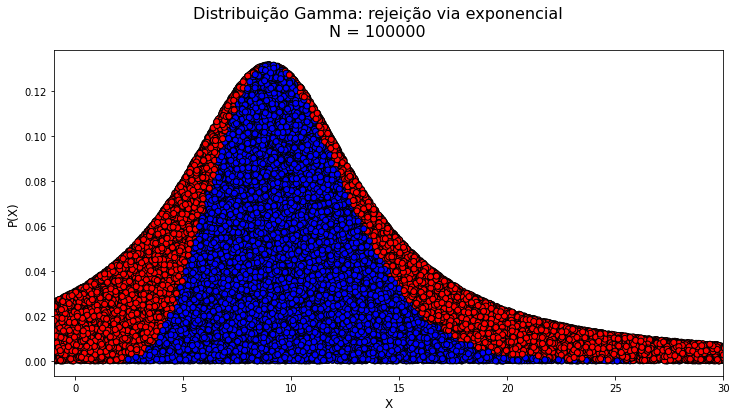

In [183]:
N = 100000
a = 10
plot_reject_cauchy(N, a)

## Mini-Projeto 6: Enchimento do triângulo

In [185]:
edge = lambda query_x,x0,y0,x1,y1: ((y1-y0)/(x1-x0))*query_x + y1

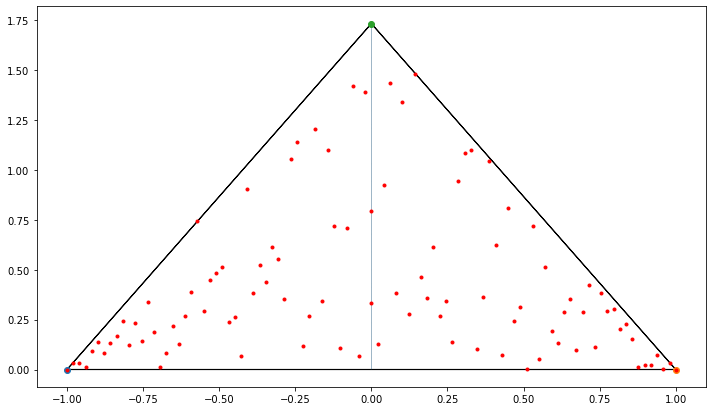

In [186]:
plt.figure(figsize=(12,7))
x0 = 0
x1_1 = 1
x1_2 = -1
y = np.sqrt(3)

plt.plot(x1_2, x0,'o')
plt.plot(x1_1, x0,'o')
plt.plot(x0 , y,'o')

plt.arrow(x1_2, x0, (x1_1 - x1_2), (x0 - x0), color='k')
plt.arrow(x1_2, x0, (x0 - x1_2), (y - x0), color='k')
plt.arrow(x0, y, (x0 - x1_2), (x0 - y), color='k')

plt.arrow(0,0,0,np.sqrt(3), ls='-.', lw=.1)

X = np.linspace(0,1)
plt.plot(X, [rnd.random()*edge(i,x0,0,x1_2,y) for i in X], '.', color='red')

X = np.linspace(-1,0)
plt.plot(X, [rnd.random()*edge(i,x1_2,0,x0,y) for i in X],'.', color='red')

plt.show()

### Preenchimento via rejeição: limitado por quadrado

In [201]:
def fill_triangle_rejection(N):
    ps_x = []
    ps_y = []
    
    ps_xlost = []
    ps_ylost = []
    
    for i in range(N):
        x1 = rnd.random()*(-1)
        y1 = rnd.random()*y
        
        if (y1 <= edge(x1,x1_2,0,x0,y)):
            ps_x.append(x1)
            ps_y.append(y1)
        else:
            ps_xlost.append(x1)
            ps_ylost.append(y1)
            
        x2 = rnd.random()
        y2 = rnd.random()*y
        
        if (y2 <= edge(x2,x0,0,x1_2,y)):
            ps_x.append(x2)
            ps_y.append(y2)
        else:
            ps_xlost.append(x2)
            ps_ylost.append(y2)
        
    return ps_x, ps_y, ps_xlost, ps_ylost

In [202]:
def plot_triangle_rejection(N):
    ps = fill_triangle_rejection(N)
    ps_x = ps[0]
    ps_y = ps[1]
    
    plt.figure(figsize=(14,8))
    plt.xlim(-1.25,1.25)
    plt.ylim(-.15, 1.8)
    plt.arrow(x1_2, x0, (x1_1 - x1_2), (x0 - x0), color='k')
    plt.arrow(x1_2, x0, (x0 - x1_2), (y - x0), color='k')
    plt.arrow(x0, y, (x0 - x1_2), (x0 - y), color='k')

    plt.arrow(0,0,0,np.sqrt(3), ls='-.', lw=.1)

    plt.plot(ps_x, ps_y, 'o', color='b', markeredgecolor='k')
    plt.plot(ps[2], ps[3], 'o', color='r', markeredgecolor='k')
    plt.show()

### Preenchimento via distribuição limitada pelas arestas

In [203]:
def fill_triangle(N):
    ps_x = []
    ps_y = []
    for i in range(N):
        x1 = rnd.random()*(-1)
        y1 = rnd.random()*(edge(x1,x1_2,0,x0,y))
        ps_x.append(x1)
        ps_y.append(y1)

        x2 = rnd.random()
        y2 = rnd.random()*(edge(x2,x0,0,x1_2,y))
        ps_x.append(x2)
        ps_y.append(y2)
        
    return ps_x, ps_y

In [207]:
def plot_triangle_limit_edges(N):
    ps = fill_triangle(N)
    ps_x = ps[0]
    ps_y = ps[1]
    
    plt.figure(figsize=(14,8))
    plt.xlim(-1.25,1.25)
    plt.ylim(-.15, 1.8)
    plt.arrow(x1_2, x0, (x1_1 - x1_2), (x0 - x0), color='k')
    plt.arrow(x1_2, x0, (x0 - x1_2), (y - x0), color='k')
    plt.arrow(x0, y, (x0 - x1_2), (x0 - y), color='k')

    plt.arrow(0,0,0,np.sqrt(3), ls='-.', lw=.1)

    plt.plot(ps_x, ps_y, 'o', color='b', markeredgecolor='k')
    plt.show()

## Resultados

### Preenchimento via rejeição: quadrado

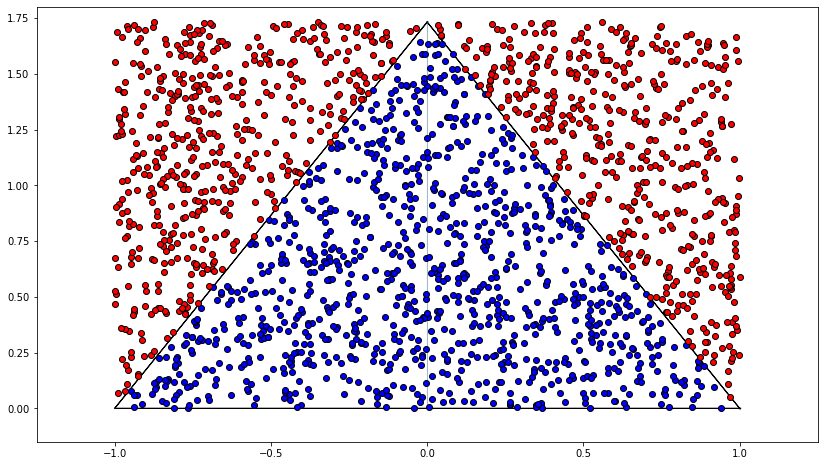

In [204]:
N = 1000
plot_triangle_rejection(N)

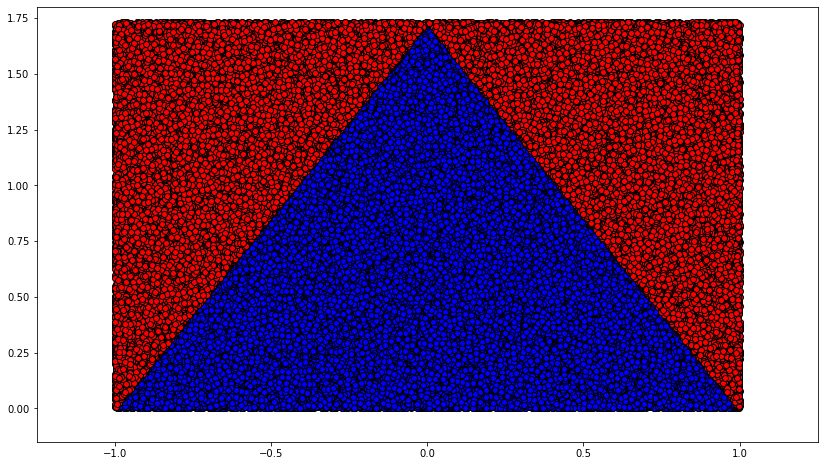

In [205]:
N = 100000
plot_triangle_rejection(N)

### Preenchimento via limitação de arestas

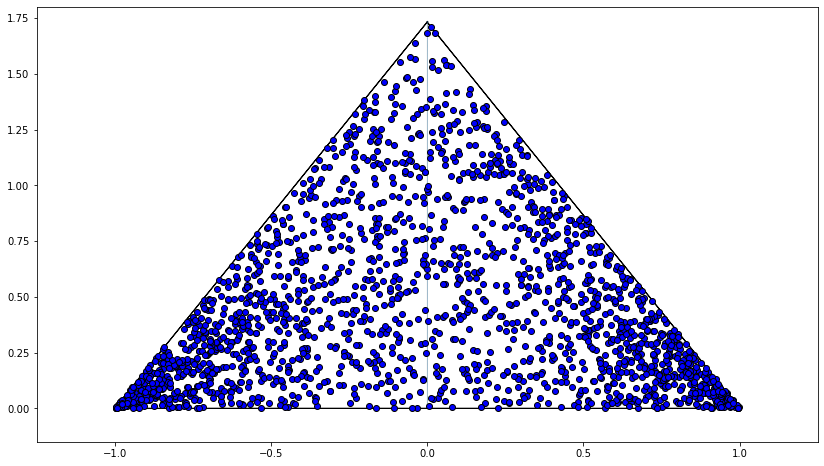

In [208]:
N = 1000
plot_triangle_limit_edges(N)

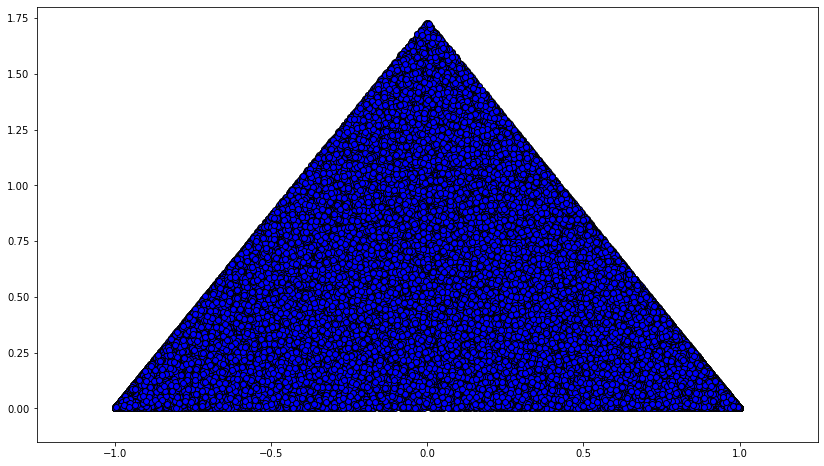

In [209]:
N = 100000
plot_triangle_limit_edges(N)